<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_sklearn/blob/main/RandomForest_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [7]:
data = load_breast_cancer()
data.data.shape

(569, 30)

In [14]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9648809523809524

随机森林第一步：先调n_estimators

看见n_estimators在什么取值开始变得平稳，是否一直推动模型整体准确率的上升等信息
第一次的学习曲线，可以先用来帮助我们划定范围，观察n_estimators的变化如何
引起模型整体准确率的变化

0.9631265664160402 71


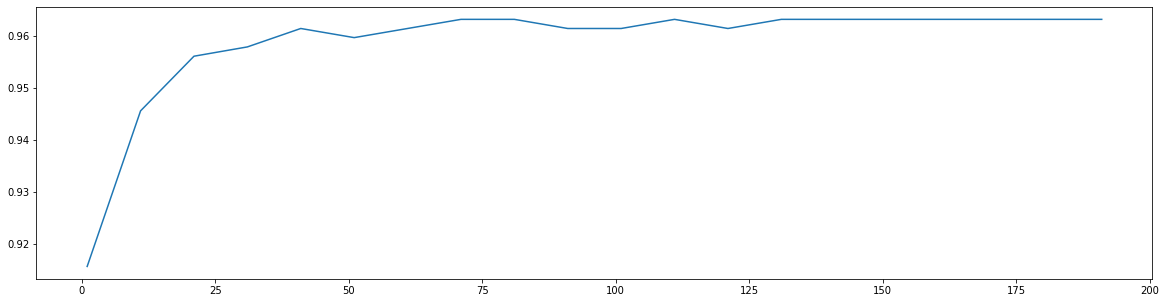

In [15]:
# 先画出学习曲线

score1=[]
for i in range(0,200,10):
  rfc = RandomForestClassifier(n_estimators=i+1
                 ,n_jobs=-1 # 表示可以使用的并行cpu个数
                 ,random_state=90            
                 )
  score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
  score1.append(score)
print(max(score1),(score1.index(max(score1))*10)+1)

plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),score1)



0.9666353383458647 73


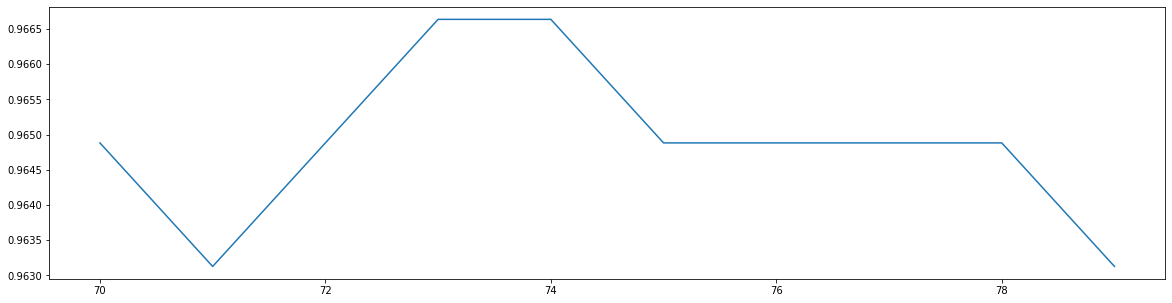

In [17]:
score1=[]
for i in range(70,80):
  rfc = RandomForestClassifier(n_estimators=i
                 ,n_jobs=-1 # 表示可以使用的并行cpu个数
                 ,random_state=90            
                 )
  score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
  score1.append(score)
print(max(score1),([*range(70,80)][score1.index(max(score1))]))

plt.figure(figsize=[20,5])
plt.plot(range(70,80),score1)

按照参数对模型整体准确的影响程度进行调参，首先调整max_depth

In [22]:
param_grid = {'max_depth': np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators=73
               ,random_state=90)

GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=73, random_state=90),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [23]:
GS.best_params_ # 显示的最佳参数

{'max_depth': 8}

In [24]:
GS.best_score_ # 显示的最佳分数

0.9666353383458647

结果发现准确率保持不变，说明目前可能在泛化误差最低点左右

下面调整max_features进行尝试

max_features是唯一一个即能够将模型往左（低方差高偏差）推，也能够将模型往右（高方差低偏差）推的参数

max_features的默认最小值是sqrt(n_features)，因此我们使用这个值作为调参范围的最小值

In [25]:
param_grid = {'max_features': np.arange(5,30,1)}
rfc = RandomForestClassifier(n_estimators=73
               ,random_state=90)

GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=73, random_state=90),
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [26]:
GS.best_params_

{'max_features': 24}

In [27]:
GS.best_score_

0.9666666666666668

In [31]:
param_grid = {'min_samples_leaf': np.arange(1,11,1)}
rfc = RandomForestClassifier(n_estimators=73
               ,random_state=90
               ,max_features=24)

GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features=24, n_estimators=73,
                                              random_state=90),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [32]:
GS.best_params_

{'min_samples_leaf': 1}

In [33]:
GS.best_score_  # 结果说明到达了泛化误差最低点

0.9666666666666668

继续尝试min_samples_split

In [34]:
param_grid = {'min_samples_split': np.arange(2,22,1)}
rfc = RandomForestClassifier(n_estimators=73
               ,random_state=90
               ,max_features=24)

GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features=24, n_estimators=73,
                                              random_state=90),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [35]:
GS.best_params_  # 防止过拟合

{'min_samples_split': 6}

In [36]:
GS.best_score_

0.9701754385964912

调整criterion

In [49]:
param_grid = {'criterion':['gini', 'entropy']}
rfc = RandomForestClassifier(n_estimators=73
                ,random_state=90
                ,max_features=24
                ,min_samples_split=6
                )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features=24,
                                              min_samples_split=6,
                                              n_estimators=73,
                                              random_state=90),
             param_grid={'criterion': ['gini', 'entropy']})

In [50]:
GS.best_params_

{'criterion': 'gini'}

In [51]:
GS.best_score_  # 准确率不变

0.9701754385964912

In [52]:
rfc = RandomForestClassifier(n_estimators=73
                ,random_state=90
                ,max_features=24
                ,min_samples_split=6)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score

0.9701754385964912

In [53]:
score-score_pre

0.005294486215538852